## China as a Global Creditor - a Data Exercise

#### 1. China’s International Investment Position 
Visit the website of China’s State Administration of Foreign Exchange (SAFE) and download time series data on China’s International Investment Position.

Loading, transforming and cleaning the data:

In [ ]:
import pandas as pd
import numpy as np

# Import Excel
SAFE_data_raw = pd.read_excel(
    r"C:\Users\jonaw\OneDrive\Dokumente\Coding\Computational Economics"
    r"\Data Viz\China as a Global Creditor - a Data Excercise"
    r"\data\The time-series data of International Investment Position of China.xlsx",
    sheet_name="Annual(USD)",
    header=2
)

# Replace / with NaN
SAFE_data_raw.replace("/", np.nan, inplace=True)
SAFE_data_raw = SAFE_data_raw.infer_objects()

# Drop first row and rows from 50
SAFE_data_raw = SAFE_data_raw.iloc[1:].reset_index(drop=True)
SAFE_data_raw = SAFE_data_raw.iloc[:50].copy()

# Check if the last row is correct
SAFE_data_raw.tail()



C:\Users\jonaw\AppData\Local\Temp\ipykernel_19212\2594260373.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  SAFE_data_raw.replace("/", np.nan, inplace=True)


,Item,end-2004,end-2005,end-2006,end-2007,end-2008,end-2009,end-2010,end-2011,end-2012,...,end-2015,end-2016,end-2017,end-2018,end-2019,end-2020,end-2021,end-2022,end-2023,end-2024
45,4.3 Loans,880.479446,869.878836,984.795590,1033.490335,1029.946605,1635.935924,2388.903419,3723.837820,3679.845576,...,3293.096160,3205.300663,3921.634464,4169.276545,4604.718066,4413.939253,4494.911130,3832.352353,3588.672696,3259.865566
46,"4.4 Insurance, pension, and standardized guara...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,93.295501,88.214142,99.594517,109.457953,134.617278,167.521862,234.777572,267.598971,268.954351,284.941510
47,4.5 Trade credit and advances,809.167798,1063.283036,1195.553505,1486.553505,1296.062792,1616.641211,2111.790000,2492.059100,2915.246576,...,2721.000000,2883.000000,3523.000000,3931.000000,3643.500000,3719.000001,4228.420004,3826.000000,3911.000002,4006.999998
48,4.6 Other accounts payable,199.938977,257.203655,376.641653,466.859675,551.716255,226.870984,222.494748,106.235383,276.991655,...,171.919164,408.030437,187.869028,153.873763,188.541657,263.008098,304.815478,357.562218,724.507553,870.072594
49,4.7 Special drawing rights,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.310000,107.425636,...,96.857933,93.964231,99.541987,97.211631,96.655254,100.674873,506.735555,481.846060,485.767187,472.175394


In [25]:
# Transform the data to long format
SAFE_data_long = SAFE_data_raw.melt(
    id_vars=["Item"],      # “Item” stays fixed
    var_name="Year",       # your year-columns become this column
    value_name="Value"     # their cell contents become this
)


# Remove the first 4 characters from the Category column
SAFE_data_long = SAFE_data_long.rename(columns={"Item": "Category"})

# Clean up Year: remove “end-” and make it integer
SAFE_data_long["Year"] = (
    SAFE_data_long["Year"]
      .str.replace("end-", "", regex=False)
      .astype(int)
)

# Set value to numeric
SAFE_data_long["Value"] = pd.to_numeric(SAFE_data_long["Value"], errors="coerce")

SAFE_data_long.head()


,Category,Year,Value
0,Net International Investment Position,2004,2407.831855
1,Assets,2004,9361.972409
2,1 Direct investment,2004,596.393975
3,1.1 Equity and investment fund shares,2004,583.393475
4,1.2 Debt instruments,2004,13.000500


1a. Is China a net creditor or a net debtor towards the rest of the world? How has its net asset position evolved over the past 20 years?

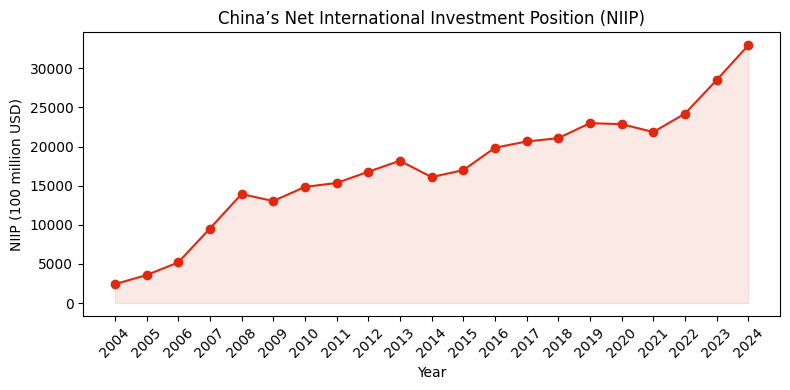

In [40]:
import matplotlib.pyplot as plt
# Define the Net International Investment Position (NIIP) (Assets - Liabilities)
niip = SAFE_data_long[SAFE_data_long["Category"] == "Net International Investment Position"]

plt.figure(figsize=(8,4))
plt.plot(niip.Year, niip.Value, 'o-', color="#DE2910" )

# Set x-ticks
plt.xticks(niip.Year, rotation=45)

# Shade under the line
plt.fill_between(niip.Year,niip.Value,color="#DE2910",alpha=0.1)

plt.title("China’s Net International Investment Position (NIIP)")
plt.xlabel("Year")
plt.ylabel("NIIP (100 million USD)")
plt.tight_layout()
plt.show()